In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
gas_turbine=pd.read_csv("gas_turbines.csv")
gas_turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas_turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gas_turbine.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [6]:
gas_turbine.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
gas_turbine.shape

(15039, 11)

In [8]:
gas_turbine1=gas_turbine.drop(["AFDP","GTEP","TIT","TAT","CDP","CO","NOX"],axis=1)
gas_turbine1

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [9]:
gas_turbine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [10]:
gas_turbine1.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


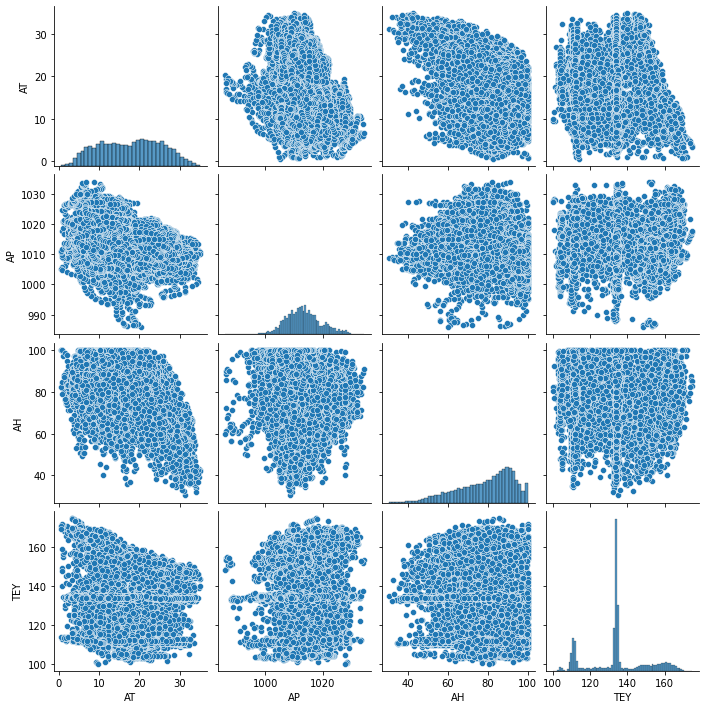

In [11]:
sns.pairplot(gas_turbine1)

In [12]:
#Data Preprocessing
scaler=MinMaxScaler()
scaled=scaler.fit_transform(gas_turbine1)
scaled_data=pd.DataFrame(scaled,columns=["AT","AP","AH","TEY"])
scaled_data

,AT,AP,AH,TEY
0,0.184182,0.456050,0.951314,0.195191
1,0.182020,0.466391,0.955881,0.195459
2,0.185295,0.474664,0.939003,0.195325
3,0.189922,0.482937,0.929126,0.195459
4,0.199830,0.493278,0.927708,0.195459
...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.153681
15035,0.214075,0.414685,0.984153,0.155965
15036,0.195962,0.422958,0.989922,0.134605
15037,0.188443,0.433299,0.982936,0.141994


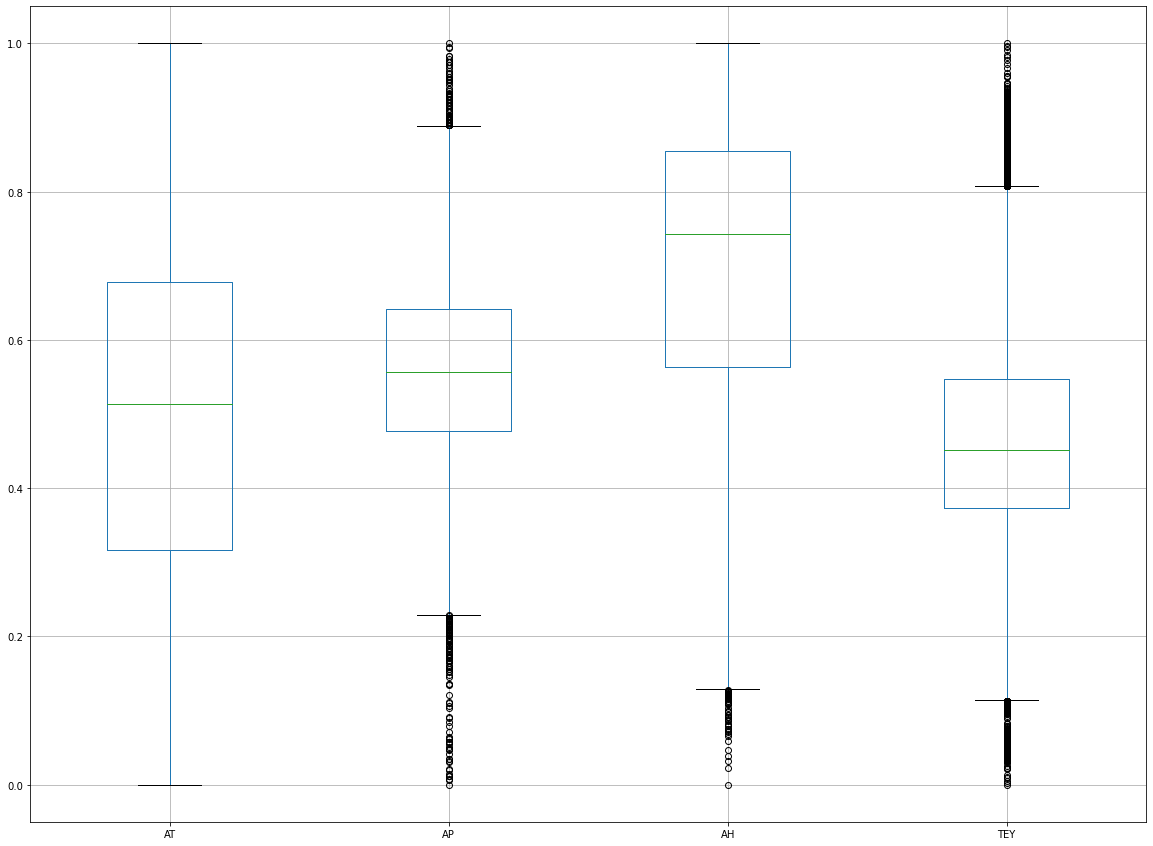

In [13]:
plt.figure(figsize=(20,15))
boxplot=scaled_data.boxplot()
plt.show()

In [14]:
gas_turbine1.corr()

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


In [15]:
#Data Splitting
X=scaled_data.iloc[:,0:-1].values
Y=scaled_data.iloc[:,-1].values

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10527, 3), (4512, 3), (10527,), (4512,))

In [18]:
#Model Building
model=Sequential()
model.add(Dense(1000,input_dim=3,kernel_initializer="normal",activation="relu"))
#model.add(Dropout(0.0))
model.add(Dense(1000,input_dim=5000,kernel_initializer="normal",activation="relu"))
#model.add(Dropout(0.0))
model.add(Dense(1,activation="linear"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              4000      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,006,001
Trainable params: 1,006,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Model Compilation
#adam=Adam(lr=0.01)
model.compile(loss="mse",optimizer="adam",metrics=["mse","mae"])

In [21]:
#Model Fitting
model_fit = model.fit(x_train, y_train, epochs=10, batch_size=100,  verbose=0, validation_split=0.3)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              4000      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,006,001
Trainable params: 1,006,001
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Prediction
y_pred=model.predict(X)
y_pred

array([[0.5891102 ],
       [0.58816755],
       [0.5848254 ],
       ...,
       [0.58987564],
       [0.5917908 ],
       [0.5909901 ]], dtype=float32)

In [24]:
#Data Evaluation
scores=model.evaluate(X,Y)
print((model.metrics_names[0],scores[0]))

470/470 [==============================] - 1s 3ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1589
('loss', 0.0402497872710228)


In [25]:
scores=model.evaluate(x_train,y_train)
print((model.metrics_names[0],scores[0]))

329/329 [==============================] - 1s 3ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1593
('loss', 0.040302395820617676)


In [26]:
scores=model.evaluate(x_test,y_test)
print((model.metrics_names[0],scores[0]))

141/141 [==============================] - 1s 3ms/step - loss: 0.0401 - mse: 0.0401 - mae: 0.1580
('loss', 0.04012700170278549)


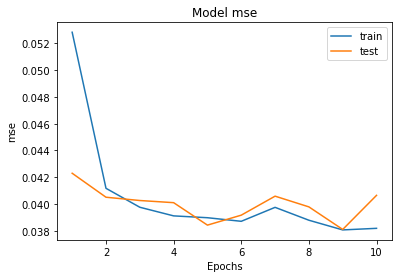

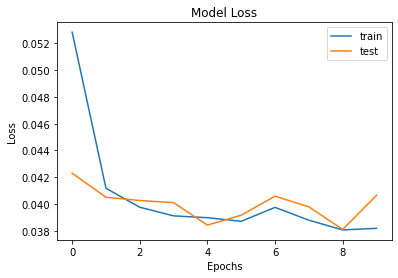

In [27]:
#Loss Visualization
epochs=range(1,len(model_fit.history["mse"])+1)
plt.plot(epochs,model_fit.history["mse"])
plt.plot(epochs,model_fit.history["val_mse"])
#plt.plot(epochs,model_fit.history["mae"],"g:")
#plt.plot(epochs,model_fit.history["val_mae"],"r--")
plt.title("Model mse")
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.legend(["train","test"])
plt.show()

# History for loss
plt.plot(model_fit.history["loss"])
plt.plot(model_fit.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

In [28]:
#Prediction Of new data point
new_data = pd.DataFrame({"AT":10,"AP":1000,"AH":98},index=[1])
new_data

,AT,AP,AH
1,10,1000,98


In [29]:
model.predict(new_data)

array([[272.37854]], dtype=float32)